In [1]:
# Import, read, and split data
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [2]:

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

# Call the randomize function
X2, y2 = randomize(X, y)




In [3]:
def draw_learning_curves(X, y, estimator, num_trainings, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Set title to include the model name
    plt.title(f"Learning Curves for {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    



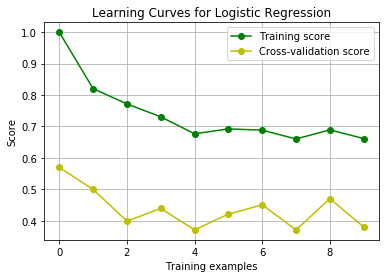

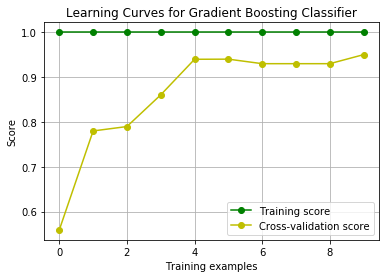

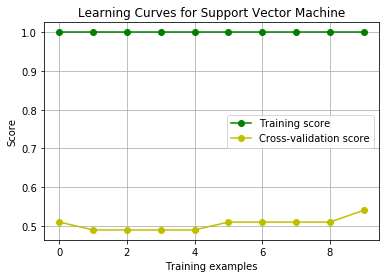

In [4]:
# Execute all three classifiers, to see the learning curve. 
# Use the generated charts to answer the quiz below.

### Logistic Regression (Uncommented to use for test run)
estimatorLogistic = LogisticRegression()

### Decision Tree
estimatorGradientBoosting = GradientBoostingClassifier()

### Support Vector Machine
estimatorSVC = SVC(kernel='rbf', gamma=1000)

# Draw learning curves using the chosen estimator
draw_learning_curves(X2, y2, estimatorLogistic, 10, "Logistic Regression")
draw_learning_curves(X2, y2, estimatorGradientBoosting, 10, "Gradient Boosting Classifier")
draw_learning_curves(X2, y2, estimatorSVC, 10, "Support Vector Machine")
